<a href="https://colab.research.google.com/github/Malikarbaaz/Deep_Learning_basic_implementation_with_hyperparameter_tuning/blob/main/ANN_basic_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN Model**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Churn_Modelling.csv'

In [4]:
data = pd.read_csv(file_path)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Independent and dependent variables
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [7]:
# Create Dummy variables
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [8]:
# Concate the dataframe
X = pd.concat([X, geography, gender], axis=1)

In [9]:
#drop unnessary column
X = X.drop(['Geography', 'Gender'], axis =1)

In [10]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [12]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

### Now lets make the ANN

In [13]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [14]:
# Initialising the ANN
classifer = Sequential()

In [15]:
#Adding the input layer and first hidden layer
classifer.add(Dense(output_dim = 6, init = 'he_uniform', activation = 'relu', input_dim = 11)) 

TypeError: ignored

In [16]:
#Adding the input layer and first hidden layer
classifer.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11)) 

In [18]:
#Adding the second hidden layer
classifer.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu')) 

In [19]:
#Adding the output layer
classifer.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))  # because o/p is binary so thatswhy we are usnig sigmoid af.

In [20]:
classifer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compiling the ANN
classifer.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
#Fitting the ANN to the Traning set
model_history = classifer.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 50)

Epoch 1/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5996 - accuracy: 0.7276 - val_loss: 0.5092 - val_accuracy: 0.7936
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4753 - accuracy: 0.7987 - val_loss: 0.4668 - val_accuracy: 0.8001
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4488 - accuracy: 0.8041 - val_loss: 0.4530 - val_accuracy: 0.8012
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8069 - val_loss: 0.4453 - val_accuracy: 0.8020
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8136 - val_loss: 0.4333 - val_accuracy: 0.8126
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4070 - accuracy: 0.8220 - val_loss: 0.4220 - val_accuracy: 0.8141
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8298 - val_loss: 0.4054 - val_accuracy: 0.8171
Epoch 

In [24]:
y_pred = classifer.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
#Calculate the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8645

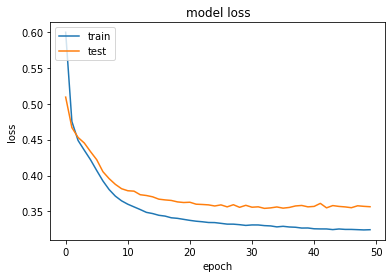

In [23]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


In [26]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
cm

array([[1519,   76],
       [ 195,  210]])